In [74]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

In [78]:
def make_gray_image(image):
    gray_image = image
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray_image = np.dot(image[..., :3], [0.30, 0.59, 0.11]).astype(np.uint8)
    return gray_image

In [76]:
def do_line_detection(image, sobel_x, sobel_y):
    pad_width = sobel_x.shape[0] // 2
    image = np.pad(image, pad_width, mode='constant')

    horizontal_edges = np.zeros_like(image)
    vertical_edges = np.zeros_like(image)
    for i in range(pad_width, image.shape[0]-pad_width):
        for j in range(pad_width, image.shape[1]-pad_width):
            local_region = image[i-pad_width : i+pad_width+1, j-pad_width : j+pad_width+1]
            horizontal_edges[i, j] = np.sum(local_region * sobel_x)
            vertical_edges[i, j] = np.sum(local_region * sobel_y)
            
    edge_magnitude = np.sqrt(horizontal_edges**2 + vertical_edges**2)
    edge_magnitude = edge_magnitude[pad_width:-pad_width, pad_width:-pad_width]
    return edge_magnitude

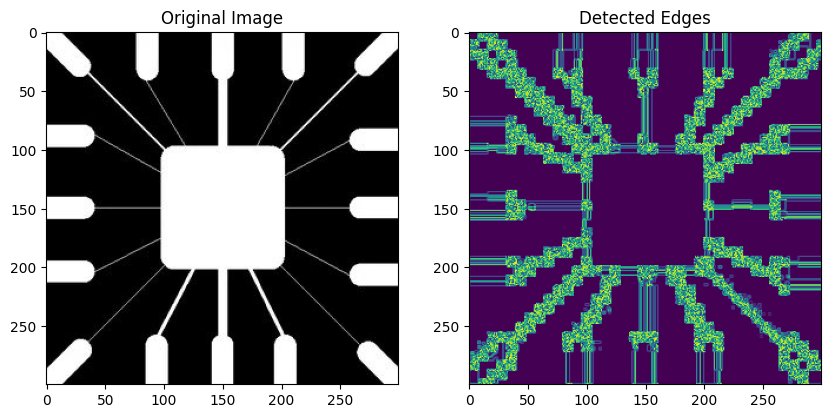

In [79]:

# Load the image (replace 'your_image_path' with the image path)
image = plt.imread('images/box.jpg')

# Convert the image to grayscale if it's in color
image = make_gray_image(image)

rows, cols = image.shape

# 3x3 Sobel kernels for edge detection
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = sobel_x.T  # Transpose for vertical edge detection

edge_magnitude = do_line_detection(image, sobel_x, sobel_y)

# # Initialize arrays to store horizontal and vertical edges
# horizontal_edges = np.zeros_like(image)
# vertical_edges = np.zeros_like(image)

# # Perform convolutions for edge detection
# for i in range(1, rows - 1):
#     for j in range(1, cols - 1):
#         # Apply the Sobel kernels at each pixel
#         local_region = image[i-1:i+2, j-1:j+2]
#         horizontal_edges[i, j] = np.sum(local_region * sobel_x)
#         vertical_edges[i, j] = np.sum(local_region * sobel_y)

# # Combine horizontal and vertical edges for visualization
# edge_magnitude = np.sqrt(horizontal_edges**2 + vertical_edges**2)

# Display the original image and detected edges
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edge_magnitude, cmap='viridis')
plt.title('Detected Edges')
plt.show()
